In [2]:
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
G = nx.read_edgelist(
    "aves-barn-swallow-contact-network/aves-barn-swallow-contact-network.edges",
    nodetype=int,
    data=[("weight", float)]
)

### Banco de dados selecionado

O banco de dados selecionado foi o Barn Swallow Contact Network, que faz parte de um conjunto de dados do Network Data Repository. Ele representa interações entre animais em diferentes contextos, incluindo ambientes selvagens, cativos e domesticados. Especificamente, esse dataset modela a rede de contato entre andorinhas (barn swallows), onde os nós representam indivíduos e as arestas indicam interações observadas entre eles, ponderadas de acordo com a frequência ou intensidade do contato.

### Escolha o layout que na sua opinião proporcionou a melhor visão do grafo e explique a sua escolha

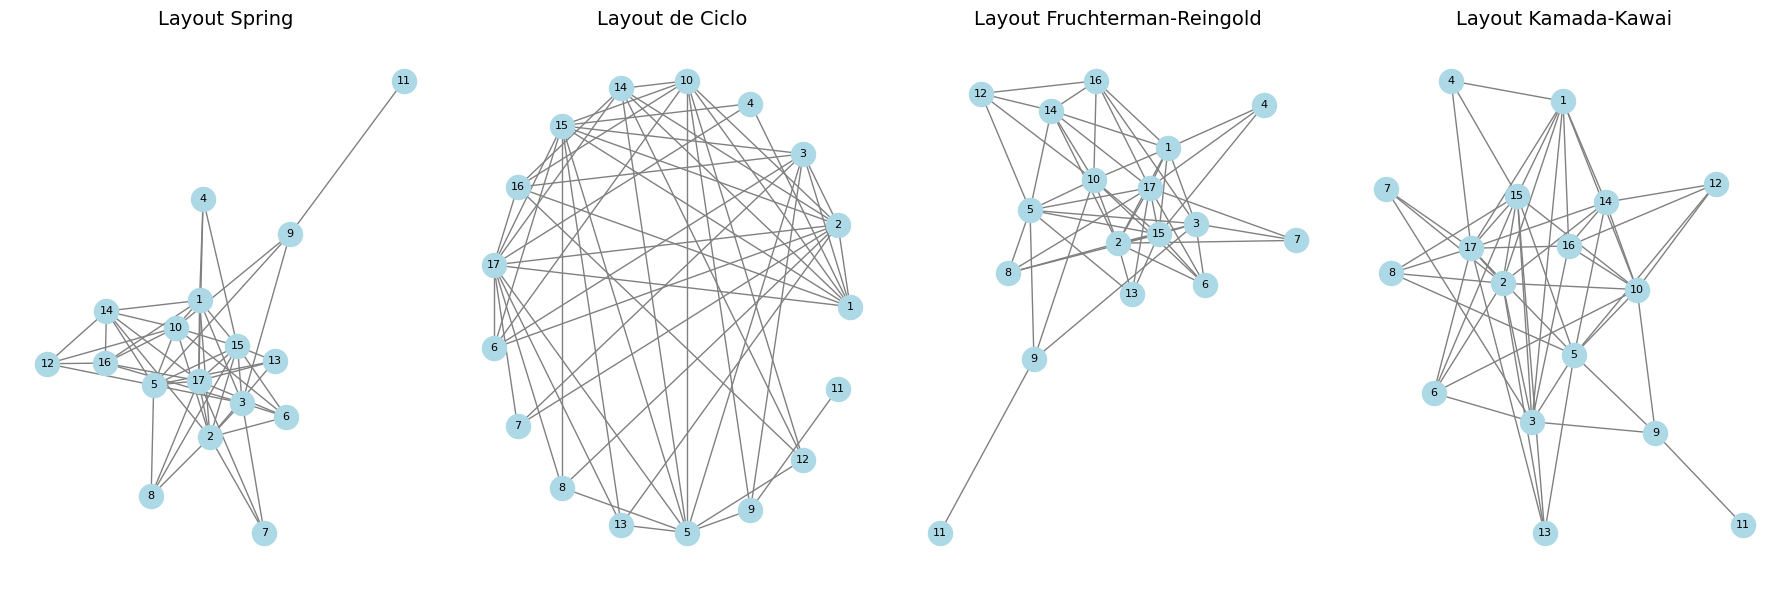

In [33]:
layouts = {
    "Layout Spring": nx.spring_layout(G, seed=42),
    "Layout de Ciclo": nx.circular_layout(G),
    "Layout Fruchterman-Reingold": nx.fruchterman_reingold_layout(G),
    "Layout Kamada-Kawai": nx.kamada_kawai_layout(G)
}

fig, axes = plt.subplots(1, 4, figsize=(18, 6))

for ax, (title, pos) in zip(axes, layouts.items()):
    ax.set_title(title, fontsize=14)
    nx.draw(
        G, pos,
        ax=ax,
        with_labels=True,
        node_size=300,
        node_color="lightblue",
        edge_color="gray",
        font_size=8
    )

plt.tight_layout()
plt.show()


Os layouts analisados foram o de spring, de ciclo, Fruchterman-Reingold e o de Kamada-Kawai. Analisando-se os plots do grafo, acredito que o de melhor entendimento é o grafo de ciclo. Nele, é possível observar melhor o relacionamento entre as aves, mesmo quando existem sobreposições entre as arestas. Por outro lado, os outros layouts utilizados, quando possuem sobreposição, não facilita o seu entendimento pois as suas arestas ficam bastante próximas. A única vantagem dos outros layouts é o fácil entendimento dos vértices que estão mais isolados, como o caso do 11, que possui apenas 1 grau. No entanto, também é possível observar esse mesmo padrão no layout de ciclo, embora o vértice não fique tão isolado.

### Exiba todas as medidas de distância do grafo (distância média, diâmetro, excentricidade, raio, periferia e centro)

In [5]:
if nx.is_connected(G):
    avg_distance = nx.average_shortest_path_length(G)
    diameter = nx.diameter(G)
    eccentricity = nx.eccentricity(G)
    radius = nx.radius(G)
    periphery = nx.periphery(G)
    center = nx.center(G)

    print(f"Distância Média: {avg_distance:.4f}")
    print(f"Diâmetro: {diameter}")
    print(f"Raio: {radius}")
    print(f"Periferia: {periphery}")
    print(f"Centro: {center}")
else:
    print("O grafo não é conexo! Calcule as métricas para cada componente separadamente.")

Distância Média: 1.7279
Diâmetro: 4
Raio: 2
Periferia: [4, 11]
Centro: [3, 10, 5]


A distância média representa o comprimento médio dos caminhos mais curtos entre todos os pares de nós. Como o valor é relativamente baixo próximo de 2, isso indica que o grafo é bem conectado e as interações entre os indivíduos são eficientes. O diâmetro indica que, no pior caso, qualquer nó pode ser alcançado a partir de outro em no máximo 4 passos, reforçando a conectividade da rede. Agora, interpretando o raio, tem-se que um raio 2 indica que há pelo menos um nó no centro do grafo a partir do qual todos os outros podem ser alcançados em no máximo 2 passos.

Ao se observar as métricas de periferia, ela sugere que os indivíduos representados por esses nós (4, 11) podem estar mais isolados ou ter menos conexões diretas na rede. Por fim, os nós de centro (3, 10, 5) desempenham um papel central na disseminação de informações ou interações dentro da rede de contato das andorinhas.

### Verifique se o grafo é conexo ou não. Se for um grafo direcionado, verifique se é fortemente conexo.

In [6]:
if nx.is_directed(G):
    print("O grafo é direcionado.")

    if nx.is_strongly_connected(G):
        print("O grafo é fortemente conexo.")
    else:
        print("O grafo NÃO é fortemente conexo.")
else:
    print("O grafo é não direcionado.")

    if nx.is_connected(G):
        print("O grafo é conexo.")
    else:
        print("O grafo NÃO é conexo.")


O grafo é não direcionado.
O grafo é conexo.


O grafo não é direcionado, mas é conexo. Ou seja, esse grafo não pode ser expresso como a união de dois grafos.

### Plote um gráfico dos graus dos vértices.

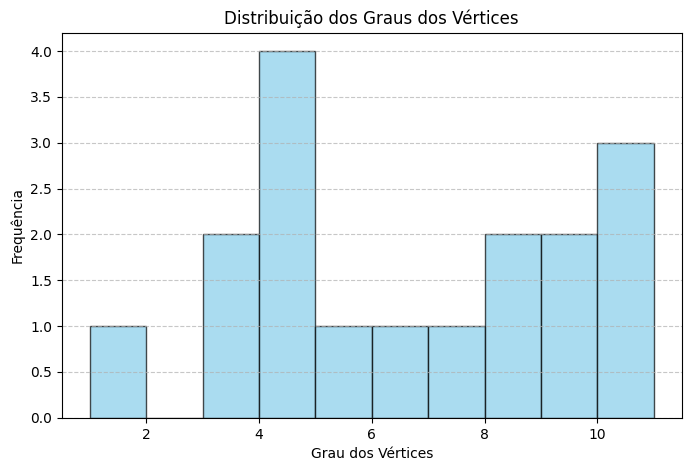

In [7]:
degrees = [G.degree(n) for n in G.nodes()]

plt.figure(figsize=(8, 5))
plt.hist(degrees, bins=range(min(degrees), max(degrees) + 1), color="skyblue", edgecolor="black", alpha=0.7)
plt.xlabel("Grau dos Vértices")
plt.ylabel("Frequência")
plt.title("Distribuição dos Graus dos Vértices")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

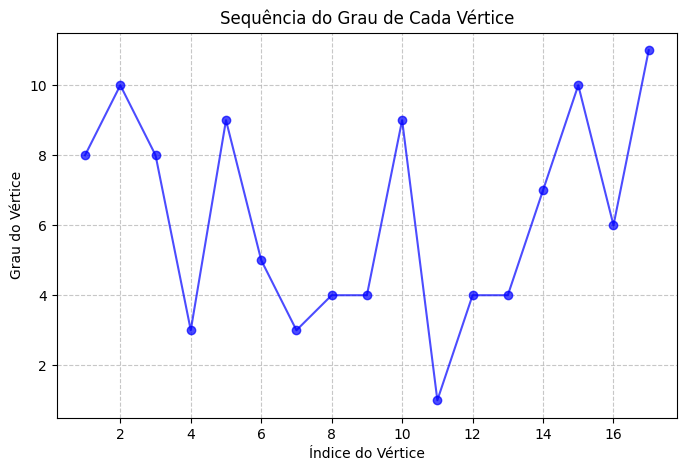

In [30]:
graus_ordenados = dict(sorted(G.degree()))
plt.figure(figsize=(8, 5))
plt.plot(graus_ordenados.keys(), graus_ordenados.values(), marker="o", linestyle="-", color="b", alpha=0.7)
plt.xlabel("Índice do Vértice")
plt.ylabel("Grau do Vértice")
plt.title("Sequência do Grau de Cada Vértice")
plt.grid(axis="both", linestyle="--", alpha=0.7)
plt.show()

Os graus dos vértices variam entre 1 e 11. Isso indica que há nós com poucas conexões (grau baixo) e outros que com muitas conexões (grau alto). A maior parte dos vértices tem um grau intermediário (entre 4 e 6), sugerindo que a rede não é altamente heterogênea. A presença de vértices com alto grau sugere que o grafo pode seguir um padrão de rede onde poucos nós possuem muitas conexões e a maioria tem poucas, isso pode indicar que alguns indivíduos desempenham um papel mais ativo na interação do grupo. O grau com maior frequência é o 4, 4 vértices tem grau 4. O vértice com o maior grau é o 17, ou seja, é aquele que possui a maior quantidade de relacionamento.